<a href="https://colab.research.google.com/github/JordMuff2710/PRA3024_AnalysisBigDataPhysics/blob/master/Exercise_1_CNN_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Part 1: Convolutional Neural Network

Convolutional Neural Network, also known as CNN is a deep learning alogithm whcih can take in an input image, like a dog or cat. By assigning importance to various aspects in the image, it will learn to be differentiate one from the (*Saha, S. (2018, December 17). A Comprehensive Guide to Convolutional Neural Networks - the ELI5 way. Retrieved March 15, 2020, from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53*) . 

Throughout this could, we want to make the difference between several objects. The objects which we want to learn that are different are the following: 


*   Airplane
*   Automobile
*   Bird
*   Cat
*   Deer
*   Dog
*   Frog
*   Horse
*   Ship 
*   Truck 

But how can we learn this. This is done by creating different layers (Fully-Connected layer), which is a way of learning non-linear combinations of high-level features (like in a picture). A image excists of an amount of pixels, colours, order, and so on. By creating these layers it is possible to form a way of learning a difference between the diferent images. 

Throughout this code there will be a CNN created which can tell with a decent accuracy the difference between different images.
 
In the picture below us, an example is set where the basic layer forming is visulaized (*Saha, S. (2018, December 17). A Comprehensive Guide to Convolutional Neural Networks - the ELI5 way. Retrieved March 15, 2020, from https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53*). 

![alt text](https://miro.medium.com/max/2055/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)


Throughout this code, some inner citation (using #) will be made to clarify what specific elements were used to build up this code. Next to that, if further explanation is needed, it will given in a text block. 

In [0]:
# Some data-handling functions to download/import the necessary datafiles/libraries. 

import numpy as np
from sklearn.model_selection import train_test_split
import os, sys
if sys.version_info[0] == 2:
    from urllib import urlretrieve
    import cPickle as pickle

else:
    from urllib.request import urlretrieve
    import pickle

def unpickle(file):
    fo = open(file, 'rb')
    if sys.version_info[0] == 2:
        dict = pickle.load(fo)
    else:
        dict = pickle.load(fo,encoding='latin1')
    
    fo.close()
    return dict


def download_cifar10(path,
                     url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                     tarname='cifar-10-python.tar.gz',):
    import tarfile
    if not os.path.exists(path):
        os.mkdir(path)
    
    urlretrieve(url, os.path.join(path,tarname))
    tfile = tarfile.open(os.path.join(path,tarname))
    tfile.extractall(path=path)
    

def load_cifar10(data_path=".",channels_last=False,test_size=0.2,random_state=1337):
    
    test_path = os.path.join(data_path,"cifar-10-batches-py/test_batch")
    train_paths = [os.path.join(data_path,"cifar-10-batches-py/data_batch_%i"%i) for i in range(1,6)]
    
    if not os.path.exists(test_path) or not all(list(map(os.path.exists, train_paths))):
        print ("Dataset not found. Downloading...")
        download_cifar10(data_path)

    train_batches = list(map(unpickle,train_paths))
    test_batch = unpickle(test_path)

    X = np.concatenate([batch["data"] for batch in train_batches]).reshape([-1,3,32,32]).astype('float32')/255
    y = np.concatenate([batch["labels"] for batch in train_batches]).astype('int32')
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=test_size,
                                                   random_state=random_state)
    
    X_test = test_batch["data"].reshape([-1,3,32,32]).astype('float32')/255
    y_test = np.array(test_batch["labels"]).astype('int32')
    
    if channels_last:
        X_train = X_train.transpose([0,2,3,1])
        X_val   = X_val.transpose([0,2,3,1])
        X_test  = X_test.transpose([0,2,3,1])

    
    return X_train,y_train,X_val,y_val,X_test,y_test

In [2]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1) # restricts GPU load for multi-user nodes

import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#check up of the necessary versions are downlaoded. 
print(tf.__version__) 
print(keras.__version__)

1.15.0
2.2.5


Using TensorFlow backend.


In [3]:
# Load the data samples. Where in we also classify the different possible images which are given in cifar10_classes down below. 

x_train,y_train,x_val,y_val,x_test,y_test = load_cifar10("cifar_data",channels_last=True)

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

#With this printinng, the shape of the train and test datafiles can be determined. It gives an inside of how the images are build up. 
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("Val samples:", x_val.shape, y_val.shape)

Train samples: (40000, 32, 32, 3) (40000,)
Test samples: (10000, 32, 32, 3) (10000,)
Val samples: (10000, 32, 32, 3) (10000,)


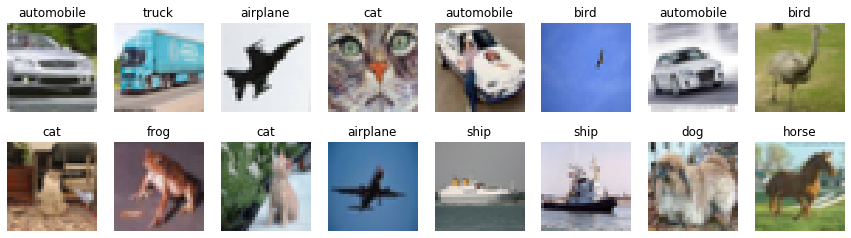

In [4]:
# show some random images from train, and their labels. With this we have a clear idea of how the images can look. 
# By using the cols and rows we determine the amount of images we want 

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]])
plt.show()

In the next step we want to normalize the inputs. To do so we will convert the class labels in to **one-hot encoded 'vectors'**. This is necessary since we are dealing with non-numerical values. 

One-hot encoded vectors are formed in the following way. It takes a column which has categorical data (like dogs, cats, ...), which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value, it will give the wanted result. 

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_val = keras.utils.to_categorical(y_val, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Now we can access our testfiles and the necessary convertions are made, we can start looking at making our CNN. I have based my forming of the following site (https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/). 

The first step in making a CNN layer is starting with small kernels which can learn the basic features of the learning process. Herefore we make use of Conv2D. Conv2D is this layer, which creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 

After that we add a Pooling layer, with this we are able to pick the relevant kernels. Then, Flatten it and add some fully-connected (Dense) normal NN layers. But now it only has one layer, which is not very useful if it wants to learn. So to learn eventually, we need to add more Dense layers. 

To end this part, a Dropout layer which is capable of avoiding the local minimum (a small given advis). And mostly important, we need to make sure taht the output is of the same shape as the amount of labels we have and those input have the same shape as the figures (which is 3rd dimensions, where we take into account the colors). 


In [0]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """

    model = Sequential()

    ### STUDENT CODE HERE ###
    model.add(Conv2D(252, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(252, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
  
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(256, activation='relu', kernel_initializer='lecun_uniform'))

    model.add(Dropout(0.2))

    # Ensure normalized probabilities over the 10 classes
    model.add(Dense(10, activation='softmax'))

    model.summary()
    ### END STUDENT CODE ###

    return model













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 252)       7056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 252)       1008      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 252)       571788    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 252)       1008      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 252)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 252)       0   

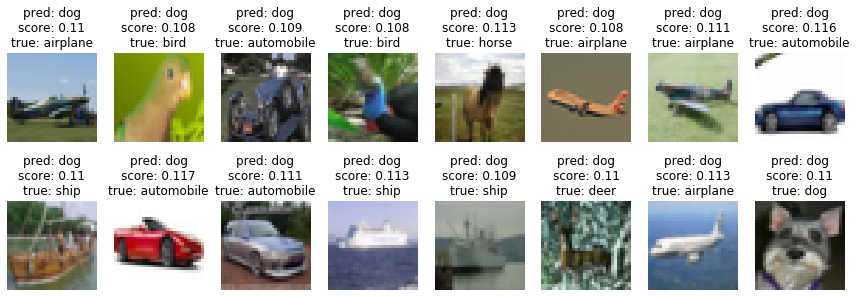

In [8]:
#As a check up, we want to see that the made CNN as has not make an effect on the data already. 
#That is why we make random run where it still predicts what it 'sees' in the images. 
#Of course this test accuracy should be very low (around 0.1). It means that it did not learn anything yet. 

from sklearn.metrics import confusion_matrix, accuracy_score

model = make_model()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# make test predictions
y_pred_test = model.predict_proba(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

# inspect preditions with out learning. 
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test_index[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

In [9]:
#For learning, we need to give some specific parameters, which are given down below. 
#This values were chosen by doing several runs and increasing the learning proces. 
# These parameters were discussed with other students. 

### STUDENT CODE HERE ###
INIT_LR = 1e-3  # initial learning rate
BATCH_SIZE = 32 # How much information it takes with him to the next run
EPOCHS = 15 # How many runs


K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# fit model
history = model.fit(
    x_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights("weights.h5")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 252)       7056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 252)       1008      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 252)       571788    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 252)       1008      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 252)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 252)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)     

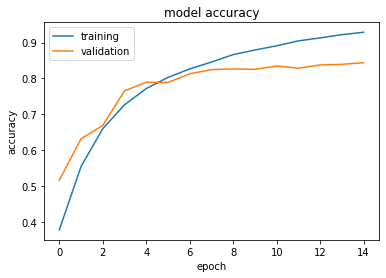

In [10]:
# With the next plot, we want to see the learning curve of the code, where the blue line,
# shows the learning process and the orange the correct validation of it. Where we can see 
# an increase in both, which is what we want. 

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [0]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

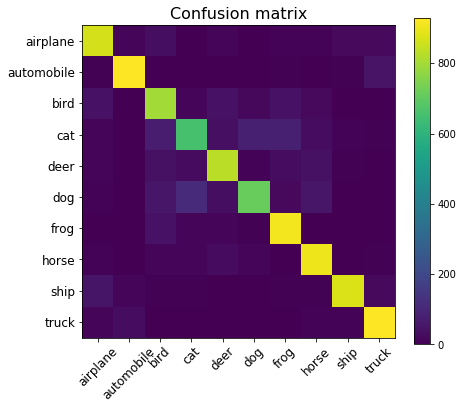

Test accuracy: 0.8425


In [12]:
# make test predictions
y_pred_test = model.predict_proba(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
# with this matrix, we are able to see which part are still confusing for the program 
# we can see for example that cat and dog still have an overlapping region. So the 
# possibility of confusion is still possible but reduced a lot compared with the initial states.

from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

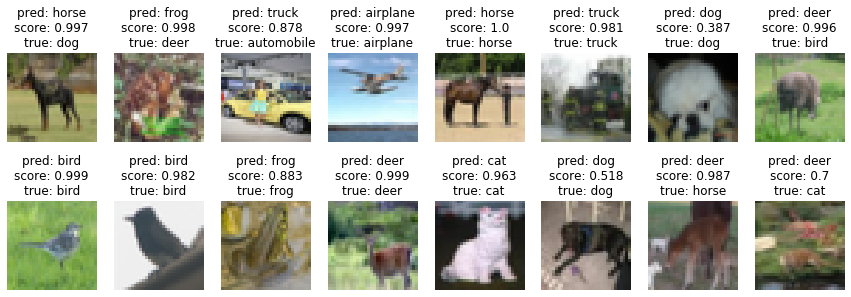

In [13]:
# inspect preditions after the learning process. Here we can see that the results increased compared to the initial state. 
# We can even see that in some images the programm is mostly certain about which choose it has to make. 
# In other parts still some confusion can be found. 
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test_index[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()